In [71]:
#importing necessary libraries
#data analysis/manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import (
    datetime,
    time,
)
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.stats as sms

In [72]:
db = pd.read_csv("tether.csv", thousands=',')

In [73]:
db

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,"Dec 16, 2019",1.000000,1.020000,0.993509,1.000000,2.389429e+10,4124418769
1,"Dec 15, 2019",1.010000,1.020000,0.983907,1.000000,1.957547e+10,4127007370
2,"Dec 14, 2019",1.000000,1.010000,0.997095,1.010000,1.901892e+10,4133054794
3,"Dec 13, 2019",1.010000,1.010000,0.996657,1.000000,1.958866e+10,4115239097
4,"Dec 12, 2019",1.010000,1.010000,0.999792,1.010000,2.112900e+10,4132023198
5,"Dec 11, 2019",1.010000,1.040000,0.979262,1.010000,1.962593e+10,4157024797
6,"Dec 10, 2019",1.000000,1.010000,0.999571,1.010000,1.914536e+10,4132097335
7,"Dec 09, 2019",1.010000,1.010000,0.997568,1.000000,1.928321e+10,4125515159
8,"Dec 08, 2019",1.010000,1.010000,1.000000,1.010000,1.655680e+10,4134238975
9,"Dec 07, 2019",1.000000,1.010000,1.000000,1.010000,1.640270e+10,4138492576


In [74]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1751 entries, 0 to 1750
Data columns (total 7 columns):
Date          1751 non-null object
Open*         1751 non-null float64
High          1751 non-null float64
Low           1751 non-null float64
Close**       1751 non-null float64
Volume        1751 non-null float64
Market Cap    1751 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 95.8+ KB


In [75]:
db['Date'] = pd.to_datetime(db['Date']).dt.date

In [ ]:
db = db.iloc[:715]

In [98]:
db.sort_values(by=['Date'], axis=0, ascending=True, inplace=True, kind='quicksort', na_position='last')

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [101]:
db.tail()

,Date,Open*,High,Low,Close**,Volume,Market Cap,USD,value_creation,cum_value_creation,max,drawdown,returns,cum_returns
4,2019-12-12,1.01,1.01,0.999792,1.01,2.112900e+10,4132023198,4.091112e+09,4.091112e+07,8.183246e+07,0.01,0.00,0.01,0.01
3,2019-12-13,1.01,1.01,0.996657,1.00,1.958866e+10,4115239097,4.115239e+09,0.000000e+00,4.092133e+07,0.01,0.01,-0.01,0.00
2,2019-12-14,1.00,1.01,0.997095,1.01,1.901892e+10,4133054794,4.092133e+09,4.092133e+07,4.092133e+07,0.01,0.00,0.01,0.01
1,2019-12-15,1.01,1.02,0.983907,1.00,1.957547e+10,4127007370,4.127007e+09,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00
0,2019-12-16,1.00,1.02,0.993509,1.00,2.389429e+10,4124418769,4.124419e+09,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


No handles with labels found to put in legend.


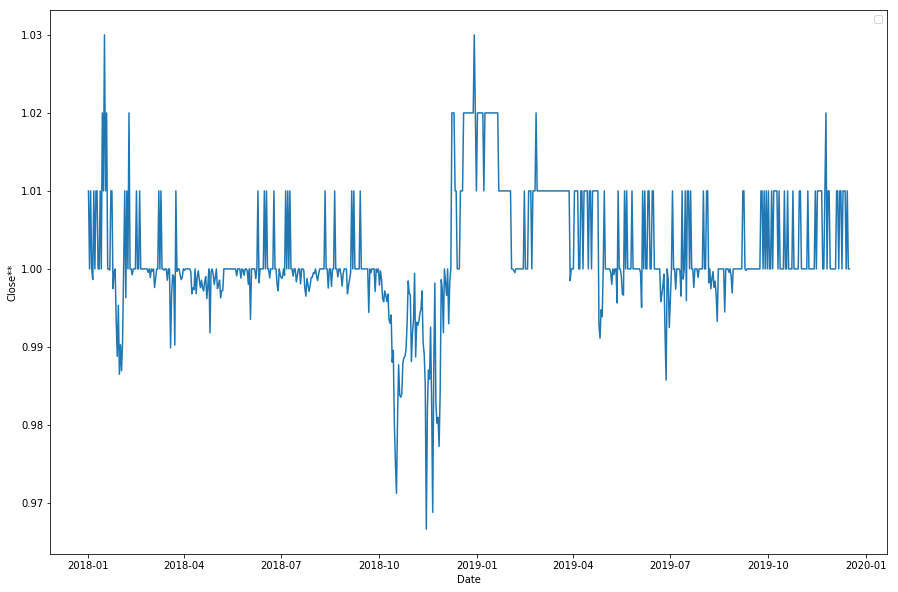

In [102]:
plt.figure(figsize=(15,10))
sns.lineplot(y = db['Close**'], x = db['Date'])
plt.legend(loc=0)
plt.show()

In [103]:
db

,Date,Open*,High,Low,Close**,Volume,Market Cap,USD,value_creation,cum_value_creation,max,drawdown,returns,cum_returns
714,2018-01-01,1.010000,1.02,1.000000,1.010000,1.685300e+09,1378049531,1.364405e+09,1.364405e+07,3.562450e+09,0.03,0.020000,0.010000,0.010000
713,2018-01-02,1.010000,1.01,0.993250,1.000000,2.635860e+09,1374793477,1.374793e+09,0.000000e+00,3.548806e+09,0.03,0.030000,-0.010000,0.000000
712,2018-01-03,1.010000,1.02,1.000000,1.010000,2.471690e+09,1386476964,1.372749e+09,1.372749e+07,3.548806e+09,0.03,0.020000,0.010000,0.010000
711,2018-01-04,1.010000,1.02,0.993822,1.000000,3.200130e+09,1471804104,1.471804e+09,0.000000e+00,3.535079e+09,0.03,0.030000,0.001366,0.000000
710,2018-01-05,1.000000,1.01,0.985915,0.998634,3.096620e+09,1466084426,1.468090e+09,-2.005411e+06,3.535079e+09,0.03,0.031366,-0.011366,-0.001366
709,2018-01-06,1.000000,1.01,0.996847,1.010000,2.620080e+09,1481287964,1.466622e+09,1.466622e+07,3.537084e+09,0.03,0.020000,0.010000,0.010000
708,2018-01-07,1.010000,1.02,0.998208,1.000000,2.338180e+09,1470394738,1.470395e+09,0.000000e+00,3.522418e+09,0.03,0.030000,-0.010000,0.000000
707,2018-01-08,1.010000,1.04,0.997617,1.010000,3.815750e+09,1481772434,1.467101e+09,1.467101e+07,3.522418e+09,0.03,0.020000,0.000000,0.010000
706,2018-01-09,1.010000,1.01,1.000000,1.010000,2.766180e+09,1476883695,1.462261e+09,1.462261e+07,3.507747e+09,0.03,0.020000,0.010000,0.010000
705,2018-01-10,1.010000,1.01,0.996446,1.000000,3.189860e+09,1469968992,1.469969e+09,0.000000e+00,3.493124e+09,0.03,0.030000,0.000000,0.000000


No handles with labels found to put in legend.


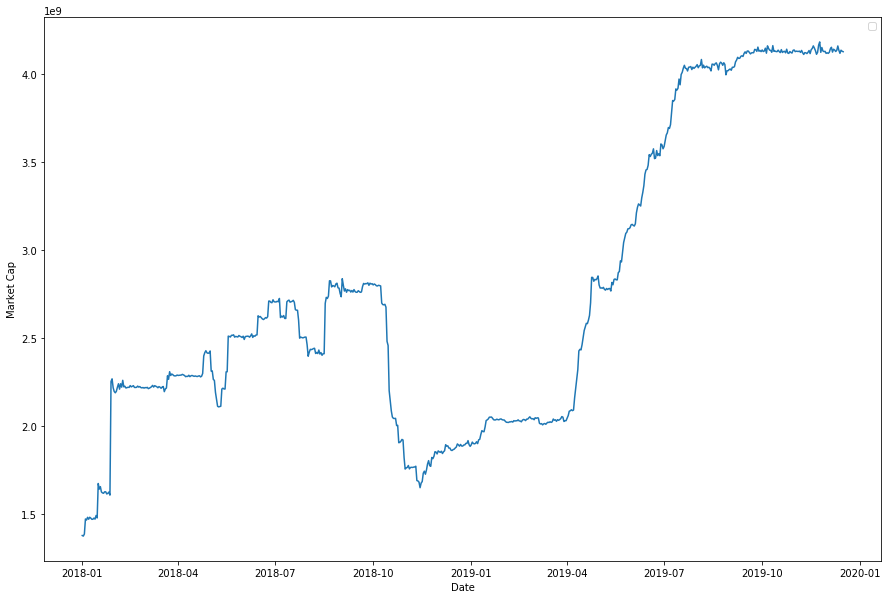

In [104]:
plt.figure(figsize=(15,10))
sns.lineplot(y = db['Market Cap'], x = db['Date'])
plt.legend(loc=0)
plt.show()

In [105]:
db['USD'] = db['Market Cap'] / db['Close**']

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
db.tail()

,Date,Open*,High,Low,Close**,Volume,Market Cap,USD,value_creation,cum_value_creation,max,drawdown,returns,cum_returns
4,2019-12-12,1.01,1.01,0.999792,1.01,2.112900e+10,4132023198,4.091112e+09,4.091112e+07,8.183246e+07,0.01,0.00,0.01,0.01
3,2019-12-13,1.01,1.01,0.996657,1.00,1.958866e+10,4115239097,4.115239e+09,0.000000e+00,4.092133e+07,0.01,0.01,-0.01,0.00
2,2019-12-14,1.00,1.01,0.997095,1.01,1.901892e+10,4133054794,4.092133e+09,4.092133e+07,4.092133e+07,0.01,0.00,0.01,0.01
1,2019-12-15,1.01,1.02,0.983907,1.00,1.957547e+10,4127007370,4.127007e+09,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00
0,2019-12-16,1.00,1.02,0.993509,1.00,2.389429e+10,4124418769,4.124419e+09,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN


No handles with labels found to put in legend.


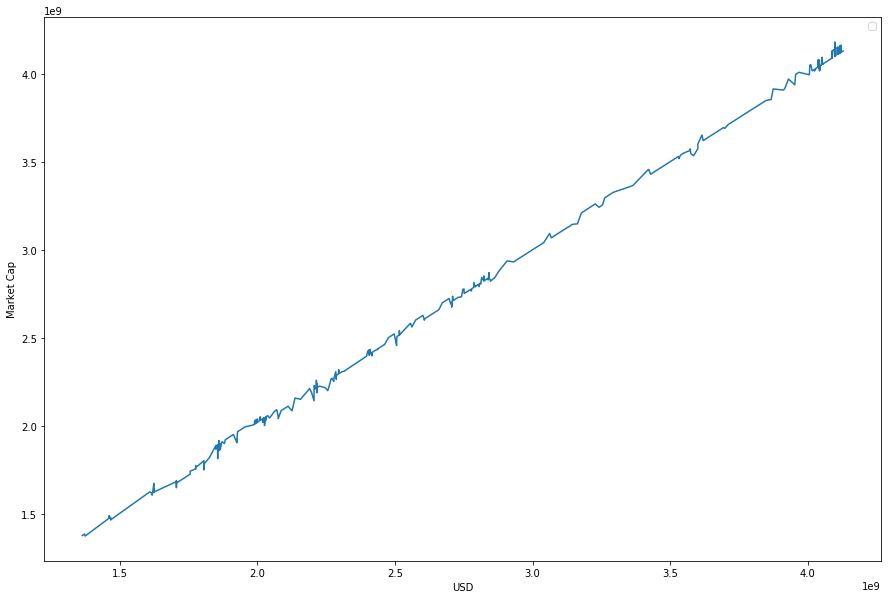

In [107]:
plt.figure(figsize=(15,10))
sns.lineplot(y = db['Market Cap'], x = db['USD'])
plt.legend(loc=0)
plt.show()

In [108]:
db['value_creation'] = db['Market Cap'] - db['USD']
db['cum_value_creation'] = db['value_creation'].cumsum()

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


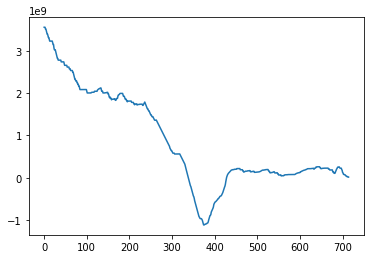

In [109]:
db['cum_value_creation'].plot()

No handles with labels found to put in legend.


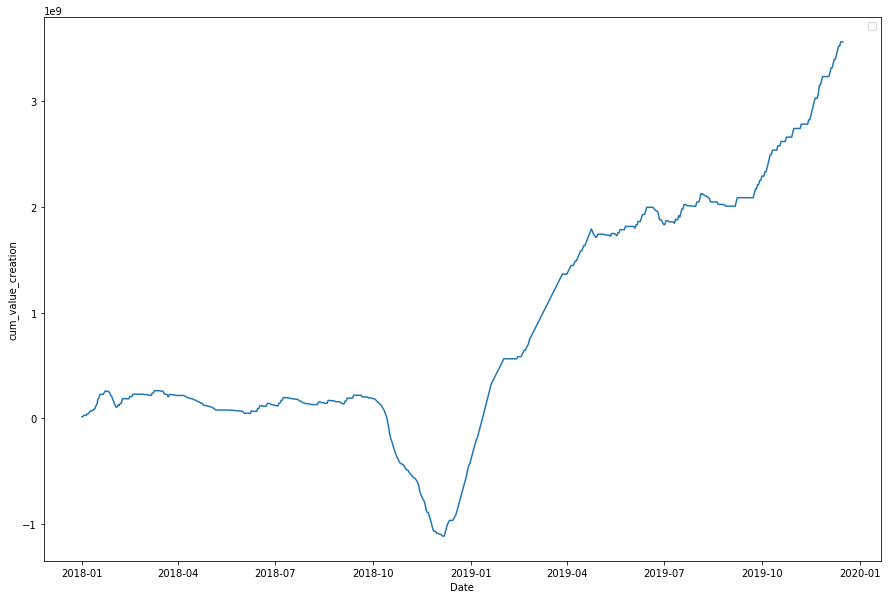

In [110]:
plt.figure(figsize=(15,10))
sns.lineplot(y = db['cum_value_creation'], x = db['Date'])
plt.legend(loc=0)
plt.show()

/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/agustinramellodelavega/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

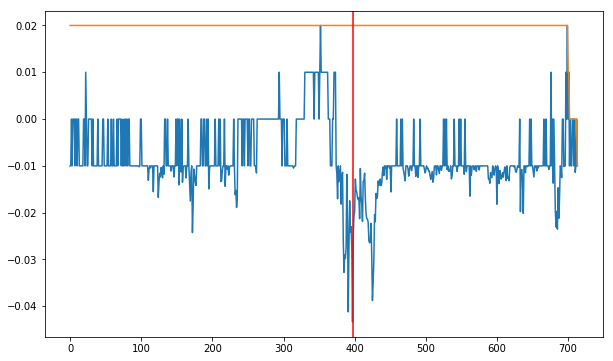

In [111]:
#Maximum Drawdown
db['returns'] = db["Close**"] - db['Close**'].shift(1)
db['cum_returns'] = db['returns'].cumsum()
db['max'] = db['cum_returns'].cummax()
db['drawdown'] = db['max'] - db['cum_returns']
#db['drawdown'].plot()
max(db['drawdown'])
t = db['drawdown'].idxmax()
ax = db['cum_returns'].plot(figsize=(10, 6))
db['max'].plot(ax=ax)
plt.axvline(t, c='r');





In [112]:
db['returns'].describe()

count    714.000000
mean      -0.000014
std        0.005899
min       -0.020000
25%       -0.000767
50%        0.000000
75%        0.000784
max        0.020000
Name: returns, dtype: float64